In [1]:
!pip install -q sentencepiece

In [2]:
!sudo apt install tesseract-ocr
!pip install -q pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,726 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [4]:
from transformers import UdopProcessor, UdopForConditionalGeneration

repo_id = "microsoft/udop-large"

processor = UdopProcessor.from_pretrained(repo_id)
model = UdopForConditionalGeneration.from_pretrained(repo_id)

preprocessor_config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/238k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [15]:
from PIL import Image
def get_image(url):
  return Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [16]:
def get_answer(prompt):
  encoding = processor(images=image, text=prompt, return_tensors="pt")
  outputs = model.generate(**encoding, max_new_tokens=20)
  return processor.batch_decode(outputs, skip_special_tokens=True)[0]

In [17]:
url = "https://github.com/rmadiraju/llm_experiments/blob/doc-processing/Paystub-1.jpeg?raw=true"
image = get_image(url)

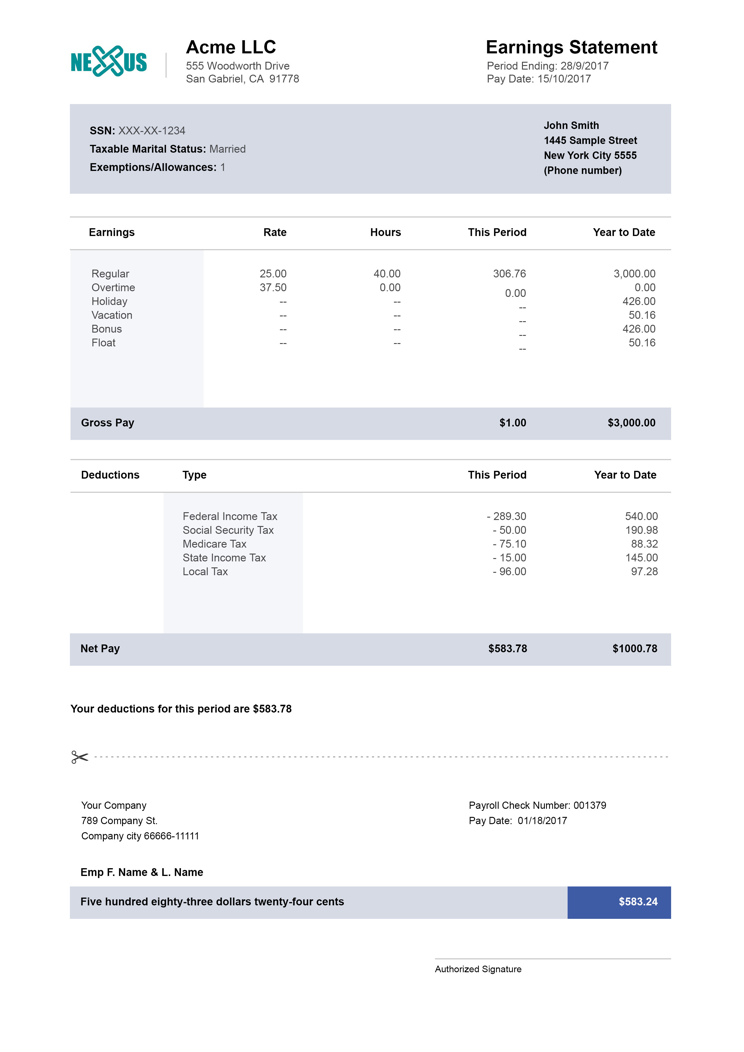

In [18]:
# Display image if required
width, height = image.size
display(image.resize((int(0.3*width), (int(0.3*height)))))

In [13]:
prompt = "Question Answering. What is the net pay?"
print(get_answer(prompt))

$583.78


In [19]:
prompt = "Question Answering. What is the pay out date?"
print(get_answer(prompt))

01/18/2017


In [21]:
prompt = "Question Answering. What is the name of the customer?"
print(get_answer(prompt))

Name and address of the customer


In [22]:
prompt = "Classify the document"
print(get_answer(prompt))

invoice
